In [3]:
import pandas as pd
import numpy as np

In [4]:
df_results = pd.read_csv('Results.csv').drop(['Marca temporal'], axis=1)
df_results = df_results.rename(columns={'Describe con precisión la imagen':'Precision_1',
                               'Es gramaticalmente correcta':'Cor_gram_1',
                               'No tiene información incorrecta':'Cor_sem_1',
                               'Es relevante para la imagen':'Relevancia_1',
                               'Está construida con creatividad':'Creatividad_1',
                               'Podría ser la que un humano daría':'Naturalidad_1'})
for i in range(2,11):
    df_results = df_results.rename(columns={'Describe con precisión la imagen.'+str(i-1):'Precision_'+str(i),
                               'Es gramaticalmente correcta.'+str(i-1):'Cor_gram_'+str(i),
                               'No tiene información incorrecta.'+str(i-1):'Cor_sem_'+str(i),
                               'Es relevante para la imagen.'+str(i-1):'Relevancia_'+str(i),
                               'Está construida con creatividad.'+str(i-1):'Creatividad_'+str(i),
                               'Podría ser la que un humano daría.'+str(i-1):'Naturalidad_'+str(i),})
Magnitudes = ['Precision', 'Cor_gram', 'Cor_sem', 'Relevancia', 'Creatividad', 'Naturalidad']
for i in range(1,11):
    for magn in [m+'_' for m in Magnitudes]:
        df_results[magn+str(i)] = [4 if x == 'Totalmente de acuerdo' else x for x in df_results[magn+str(i)]]
        df_results[magn+str(i)] = [3 if x == 'Parcialmente de acuerdo' else x for x in df_results[magn+str(i)]]
        df_results[magn+str(i)] = [2 if x == 'Ni de acuerdo ni en desacuerdo' else x for x in df_results[magn+str(i)]]
        df_results[magn+str(i)] = [1 if x == 'Parcialmente en desacuerdo' else x for x in df_results[magn+str(i)]]
        df_results[magn+str(i)] = [0 if x == 'Totalmente en desacuerdo' else x for x in df_results[magn+str(i)]]

In [5]:
df_results.describe()

,Precision_1,Cor_gram_1,Cor_sem_1,Relevancia_1,Creatividad_1,Naturalidad_1,Precision_2,Cor_gram_2,Cor_sem_2,Relevancia_2,...,Cor_sem_9,Relevancia_9,Creatividad_9,Naturalidad_9,Precision_10,Cor_gram_10,Cor_sem_10,Relevancia_10,Creatividad_10,Naturalidad_10
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,2.471698,3.056604,2.188679,3.113208,2.679245,2.264151,2.207547,2.981132,2.773585,2.094340,...,1.584906,2.301887,2.735849,1.584906,0.924528,1.981132,0.603774,1.867925,2.132075,1.113208
std,1.102511,0.841589,1.557323,0.933570,1.070111,1.332305,1.445929,1.322739,1.539749,1.304786,...,1.420102,1.202320,1.058863,1.307287,1.089267,1.337198,1.044024,1.414727,1.177313,1.382033
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,3.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,1.000000,3.000000,3.000000,1.000000,1.000000,2.000000,0.000000,2.000000,2.000000,0.000000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,...,3.000000,3.000000,4.000000,2.000000,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [6]:
df2 = pd.DataFrame()
for magn in Magnitudes:
    l = []
    for i in range(1,11):
        l.append(np.mean(df_results[magn+'_'+str(i)]))
    
    df2[magn] = l
df2.describe()

,Precision,Cor_gram,Cor_sem,Relevancia,Creatividad,Naturalidad
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2.094340,2.781132,1.815094,2.447170,2.492453,1.745283
std,0.941802,0.488481,0.940532,0.696102,0.259078,0.797392
min,0.867925,1.981132,0.603774,1.377358,2.132075,0.962264
25%,1.292453,2.438679,1.193396,1.995283,2.320755,1.113208
50%,2.169811,2.792453,1.735849,2.301887,2.481132,1.688679
75%,2.683962,3.037736,2.165094,2.867925,2.655660,2.127358
max,3.830189,3.754717,3.679245,3.754717,2.962264,3.547170


In [7]:
df3 = pd.DataFrame()
for magn in Magnitudes:
    l = []
    for i in range(1,11):
        l.append(np.std(df_results[magn+'_'+str(i)]))
    
    df3[magn] = l
df3.describe()

,Precision,Cor_gram,Cor_sem,Relevancia,Creatividad,Naturalidad
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.098273,1.107674,1.296664,1.126687,1.121747,1.259552
std,0.219115,0.235762,0.237100,0.255308,0.086210,0.174300
min,0.606127,0.579709,0.906446,0.546193,1.035847,0.837022
25%,1.036800,1.072732,1.083756,1.014048,1.060806,1.233135
50%,1.085501,1.162543,1.401434,1.219103,1.081552,1.309481
75%,1.219505,1.276597,1.476395,1.291315,1.164316,1.337480
max,1.432223,1.324523,1.542561,1.401317,1.289385,1.471214


In [8]:
df4 = pd.DataFrame()
for magn in Magnitudes:
    l = []
    for i in range(1,11):
        l += list(df_results[magn+'_'+str(i)])
    
    df4[magn] = l
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

df4.corr().style.background_gradient(cmap=cm)

,Precision,Cor_gram,Cor_sem,Relevancia,Creatividad,Naturalidad
Precision,1.000000,0.488980,0.540058,0.651848,0.344019,0.582099
Cor_gram,0.488980,1.000000,0.377514,0.385992,0.438953,0.411095
Cor_sem,0.540058,0.377514,1.000000,0.408135,0.243525,0.362002
Relevancia,0.651848,0.385992,0.408135,1.000000,0.382861,0.562405
Creatividad,0.344019,0.438953,0.243525,0.382861,1.000000,0.337503
Naturalidad,0.582099,0.411095,0.362002,0.562405,0.337503,1.000000


In [9]:
medias = df_results.mean()

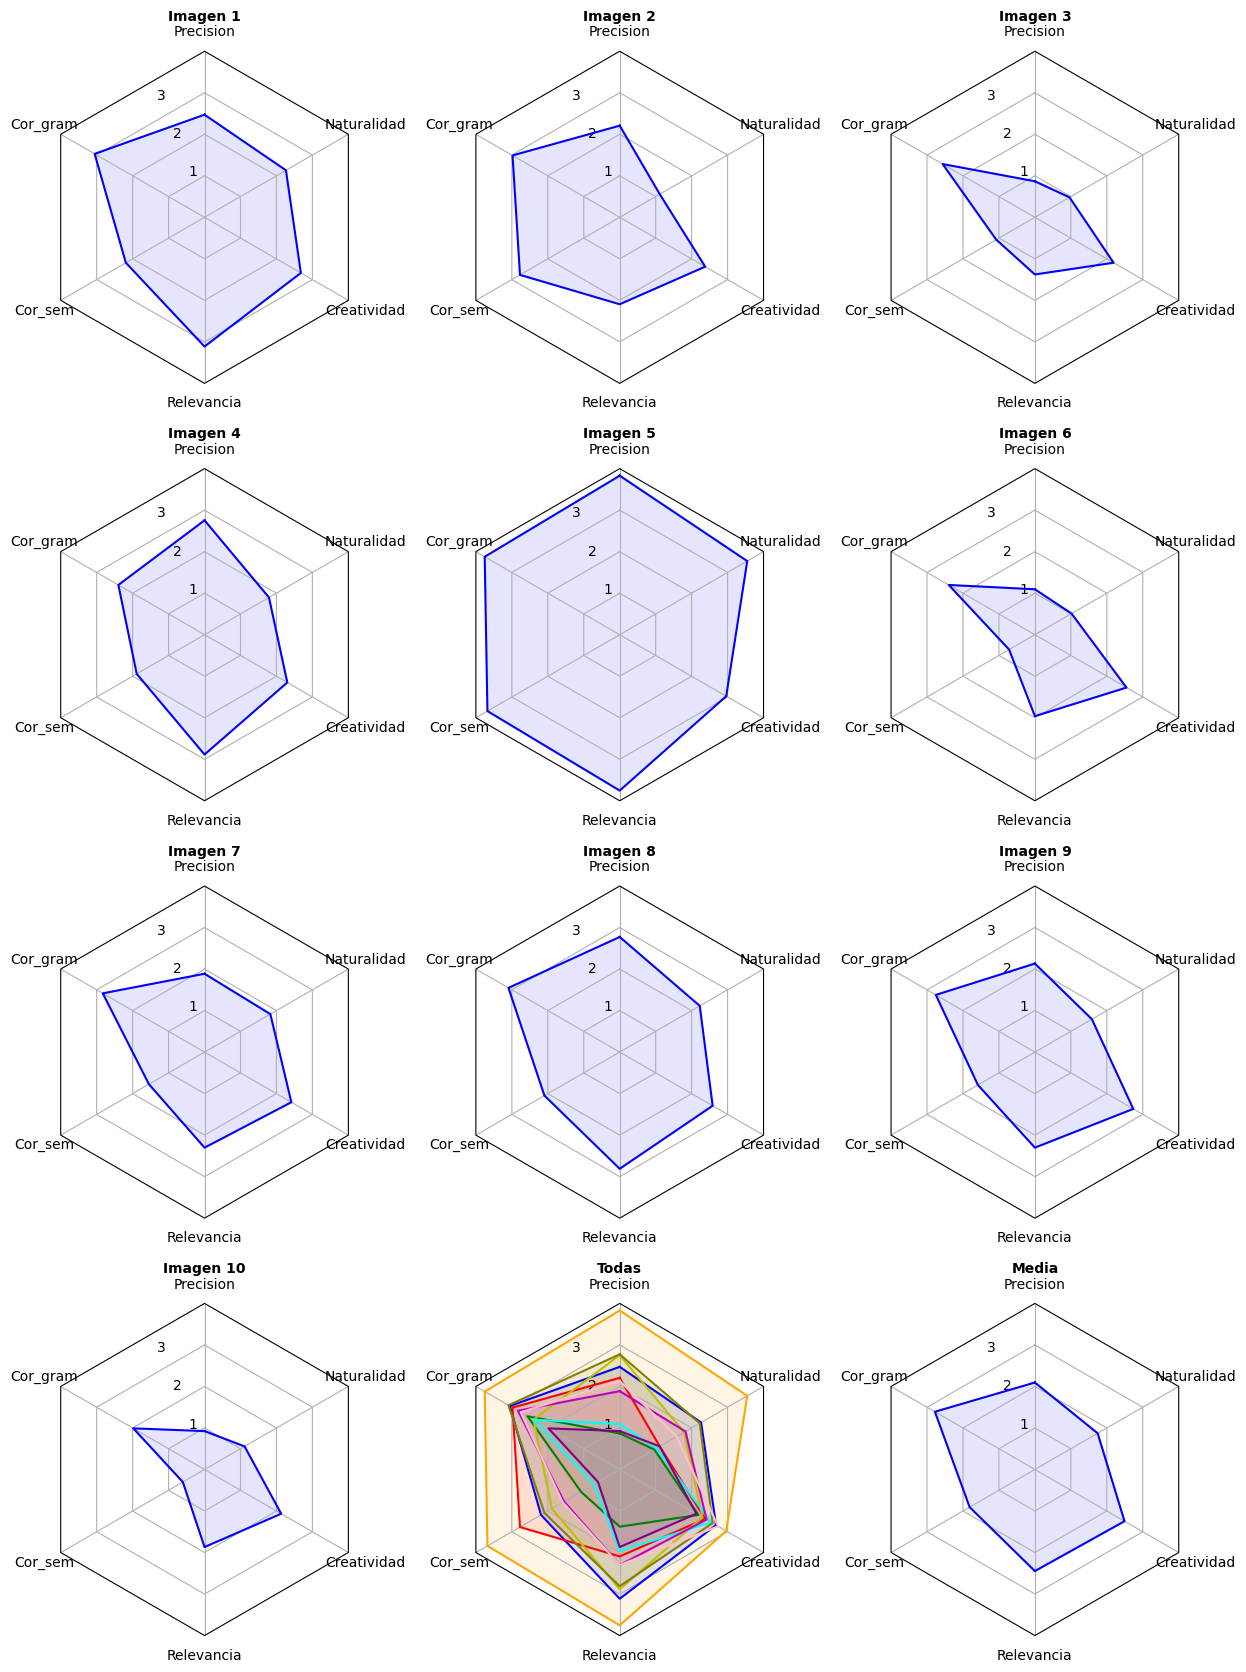

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` Axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding Axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
    
    data = [
        Magnitudes        
    ]
    
    for i in range(1,11):
        data.append(('Imagen '+str(i), [
            [medias[magn+'_'+str(i)] for magn in Magnitudes],
            ]))
        
    data.append(('Todas', [
            [medias[magn+'_'+str(i)] for magn in Magnitudes]
            for i in range(1,11)
    ]))
    
    data.append(('Media', [
            [np.mean([medias[magn+'_'+str(i)] for i in range(1,11)]) for magn in Magnitudes]
            
    ]))
    return data


if __name__ == '__main__':
    N = 6
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axs = plt.subplots(figsize=(15, 20), nrows=4, ncols=3,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'y', 'orange', 'cyan', 'm', 'olive', 'pink', 'purple']
    # Plot 
    for ax, (title, case_data) in zip(axs.flat, data):
        ax.set_rgrids([1,2,3])
        ax.set_ylim(0, 4)
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.1, label='_nolegend_')
        ax.set_varlabels(spoke_labels)


    #fig.text(0.5, 0.965, 'Resultados medios por imagen',
    #         horizontalalignment='center', color='black', weight='bold',
    #         size='large')

    #plt.show()
    plt.savefig('./spider.png')